In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load Necessary libraries

In [2]:
from __future__ import print_function
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset
import numpy as np
from torchsummary import summary

In [3]:
import warnings
warnings.simplefilter("ignore")
warnings.warn("deprecated", DeprecationWarning)
warnings.filterwarnings( "ignore", module = "matplotlib\..*" )

In [ ]:
# import albumentations as A
# import cv2

In [ ]:
# from albumentations.pytorch import ToTensorV2
# from PIL import Image
# import matplotlib.pyplot as plt

In [4]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

CUDA Available? True


Load all the modules

In [5]:
!cp /content/drive/MyDrive/The\ School\ of\ AI/Session\ 10\ Assignment/dataload.py /content
#!cp /content/drive/MyDrive/The\ School\ of\ AI/Session\ 9\ Assignment/model.py /content
!cp /content/drive/MyDrive/The\ School\ of\ AI/Session\ 10\ Assignment/model_v1.py /content
!cp /content/drive/MyDrive/The\ School\ of\ AI/Session\ 10\ Assignment/run_v1.py /content
!cp /content/drive/MyDrive/The\ School\ of\ AI/Session\ 10\ Assignment/utils.py /content

In [6]:
import dataload
import model_v1
import run_v1
import utils

from dataload import Draw, AlbumentationImageDataset, args, loader
from model_v1 import CustomResNet, return_summary
from run_v1 import Performance, scores, train, test
from utils import allot_device, Plots, plot_metrics

In [7]:
train_loader,test_loader = loader.load_data(512)
print(len(train_loader),len(test_loader))

100%|██████████| 170498071/170498071 [00:14<00:00, 11629376.38it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
98 20


<Figure size 640x480 with 0 Axes>

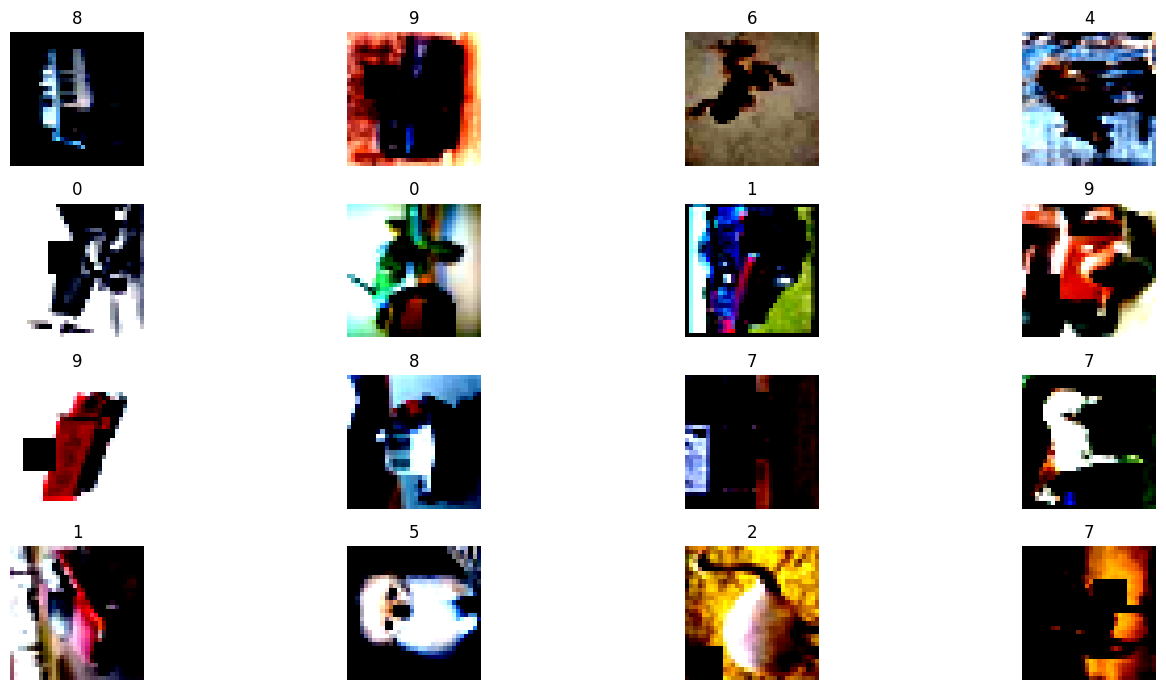

In [ ]:
#train_data
Plots(None,17,train_loader).plot_images()

<Figure size 640x480 with 0 Axes>

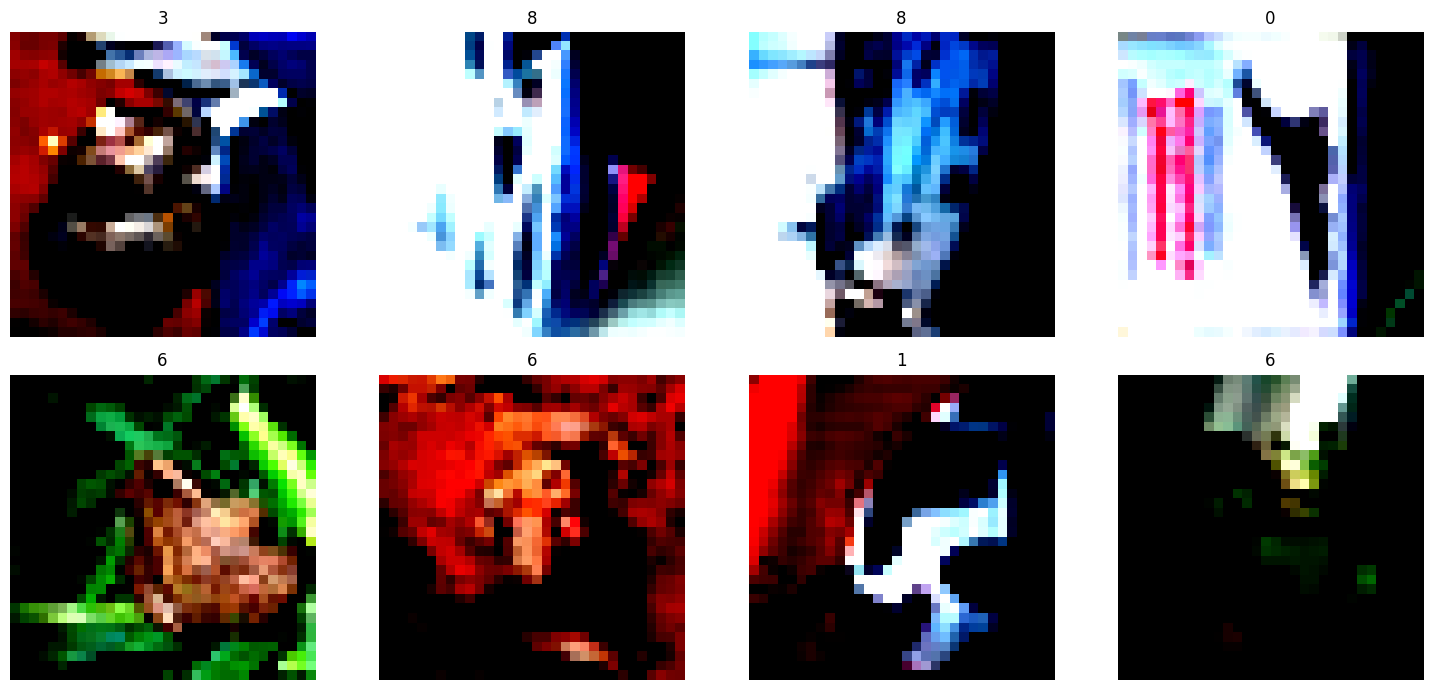

In [ ]:
#test_data
Plots(None,9,test_loader).plot_images()

In [8]:
 # Setting up the device
device = allot_device(142)
print(f"{device} is available")

cuda is available


In [9]:
model = CustomResNet().to(device)

return_summary(model,device,(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
           Dropout-4           [-1, 64, 32, 32]               0
            Conv2d-5          [-1, 128, 32, 32]          73,856
         MaxPool2d-6          [-1, 128, 16, 16]               0
       BatchNorm2d-7          [-1, 128, 16, 16]             256
              ReLU-8          [-1, 128, 16, 16]               0
           Dropout-9          [-1, 128, 16, 16]               0
           Conv2d-10          [-1, 128, 16, 16]         147,584
      BatchNorm2d-11          [-1, 128, 16, 16]             256
             ReLU-12          [-1, 128, 16, 16]               0
          Dropout-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1, 128,

In [10]:
!pip install torch_lr_finder

In [11]:
from torch_lr_finder import LRFinder

  0%|          | 0/200 [00:00<?, ?it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 4.26E-02


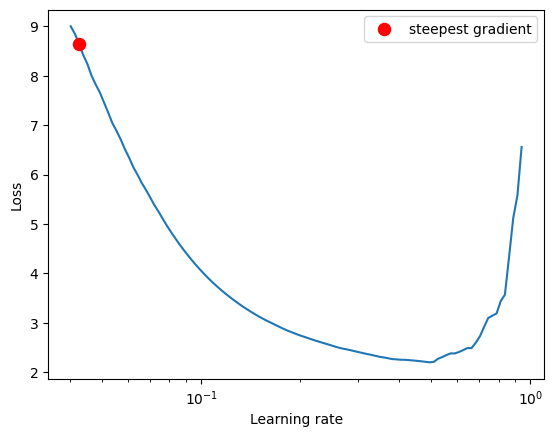

In [12]:
model = CustomResNet().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.03, weight_decay=1e-4)
criterion = nn.CrossEntropyLoss()
lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(train_loader, end_lr=10, num_iter=200, step_mode="exp")
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

In [13]:
from torch.optim.lr_scheduler import OneCycleLR

EPOCHS = 24

scheduler = OneCycleLR(
        optimizer,
        #max_lr=5.22E-02,
        max_lr=4.26E-02,
        steps_per_epoch=len(train_loader),
        epochs=EPOCHS,
        pct_start=5/EPOCHS,
        div_factor=100,
        three_phase=False,
        final_div_factor=100,
        anneal_strategy='linear'
    )
criterion = nn.CrossEntropyLoss()
#perf = Performance(device,model,(train_loader,test_loader),optimizer,criterion,[False,0.01])

for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch, criterion,scheduler)
    test(model, device, test_loader, criterion)
    #scheduler.step()

EPOCH: 0


Loss=1.09713876247406 Batch_id=97 Accuracy=45.14: 100%|██████████| 98/98 [00:31<00:00,  3.10it/s]



Test set: Average loss: 0.0024, Accuracy: 5985/10000 (59.85%)

EPOCH: 1


Loss=0.9907605051994324 Batch_id=97 Accuracy=63.42: 100%|██████████| 98/98 [00:31<00:00,  3.12it/s]



Test set: Average loss: 0.0020, Accuracy: 6485/10000 (64.85%)

EPOCH: 2


Loss=0.7417478561401367 Batch_id=97 Accuracy=71.50: 100%|██████████| 98/98 [00:31<00:00,  3.11it/s]



Test set: Average loss: 0.0022, Accuracy: 6355/10000 (63.55%)

EPOCH: 3


Loss=0.6216815114021301 Batch_id=97 Accuracy=74.73: 100%|██████████| 98/98 [00:31<00:00,  3.15it/s]



Test set: Average loss: 0.0025, Accuracy: 6129/10000 (61.29%)

EPOCH: 4


Loss=0.6274248361587524 Batch_id=97 Accuracy=76.15: 100%|██████████| 98/98 [00:31<00:00,  3.15it/s]



Test set: Average loss: 0.0016, Accuracy: 7190/10000 (71.90%)

EPOCH: 5


Loss=0.721981942653656 Batch_id=97 Accuracy=77.17: 100%|██████████| 98/98 [00:31<00:00,  3.16it/s]



Test set: Average loss: 0.0015, Accuracy: 7307/10000 (73.07%)

EPOCH: 6


Loss=0.6637678742408752 Batch_id=97 Accuracy=78.44: 100%|██████████| 98/98 [00:31<00:00,  3.13it/s]



Test set: Average loss: 0.0016, Accuracy: 7195/10000 (71.95%)

EPOCH: 7


Loss=0.6798738837242126 Batch_id=97 Accuracy=78.60: 100%|██████████| 98/98 [00:31<00:00,  3.16it/s]



Test set: Average loss: 0.0019, Accuracy: 6908/10000 (69.08%)

EPOCH: 8


Loss=0.534186840057373 Batch_id=97 Accuracy=79.16: 100%|██████████| 98/98 [00:31<00:00,  3.12it/s]



Test set: Average loss: 0.0014, Accuracy: 7653/10000 (76.53%)

EPOCH: 9


Loss=0.5791780352592468 Batch_id=97 Accuracy=79.92: 100%|██████████| 98/98 [00:31<00:00,  3.15it/s]



Test set: Average loss: 0.0013, Accuracy: 7880/10000 (78.80%)

EPOCH: 10


Loss=0.5964263677597046 Batch_id=97 Accuracy=80.39: 100%|██████████| 98/98 [00:31<00:00,  3.11it/s]



Test set: Average loss: 0.0017, Accuracy: 7055/10000 (70.55%)

EPOCH: 11


Loss=0.5598261952400208 Batch_id=97 Accuracy=80.33: 100%|██████████| 98/98 [00:30<00:00,  3.17it/s]



Test set: Average loss: 0.0018, Accuracy: 6921/10000 (69.21%)

EPOCH: 12


Loss=0.512459933757782 Batch_id=97 Accuracy=80.95: 100%|██████████| 98/98 [00:31<00:00,  3.13it/s]



Test set: Average loss: 0.0014, Accuracy: 7560/10000 (75.60%)

EPOCH: 13


Loss=0.5422782301902771 Batch_id=97 Accuracy=81.37: 100%|██████████| 98/98 [00:30<00:00,  3.18it/s]



Test set: Average loss: 0.0013, Accuracy: 7825/10000 (78.25%)

EPOCH: 14


Loss=0.6318373680114746 Batch_id=97 Accuracy=82.26: 100%|██████████| 98/98 [00:30<00:00,  3.16it/s]



Test set: Average loss: 0.0019, Accuracy: 6893/10000 (68.93%)

EPOCH: 15


Loss=0.46059176325798035 Batch_id=97 Accuracy=82.60: 100%|██████████| 98/98 [00:30<00:00,  3.26it/s]



Test set: Average loss: 0.0011, Accuracy: 8122/10000 (81.22%)

EPOCH: 16


Loss=0.5390509366989136 Batch_id=97 Accuracy=83.49: 100%|██████████| 98/98 [00:30<00:00,  3.25it/s]



Test set: Average loss: 0.0010, Accuracy: 8241/10000 (82.41%)

EPOCH: 17


Loss=0.45519891381263733 Batch_id=97 Accuracy=84.61: 100%|██████████| 98/98 [00:31<00:00,  3.16it/s]



Test set: Average loss: 0.0009, Accuracy: 8415/10000 (84.15%)

EPOCH: 18


Loss=0.560519278049469 Batch_id=97 Accuracy=84.71: 100%|██████████| 98/98 [00:30<00:00,  3.19it/s]



Test set: Average loss: 0.0010, Accuracy: 8265/10000 (82.65%)

EPOCH: 19


Loss=0.375372976064682 Batch_id=97 Accuracy=86.51: 100%|██████████| 98/98 [00:30<00:00,  3.19it/s]



Test set: Average loss: 0.0008, Accuracy: 8657/10000 (86.57%)

EPOCH: 20


Loss=0.4668737053871155 Batch_id=97 Accuracy=87.82: 100%|██████████| 98/98 [00:31<00:00,  3.16it/s]



Test set: Average loss: 0.0007, Accuracy: 8775/10000 (87.75%)

EPOCH: 21


Loss=0.34730544686317444 Batch_id=97 Accuracy=89.31: 100%|██████████| 98/98 [00:30<00:00,  3.18it/s]



Test set: Average loss: 0.0007, Accuracy: 8838/10000 (88.38%)

EPOCH: 22


Loss=0.25410428643226624 Batch_id=97 Accuracy=91.51: 100%|██████████| 98/98 [00:30<00:00,  3.20it/s]



Test set: Average loss: 0.0006, Accuracy: 8946/10000 (89.46%)

EPOCH: 23


Loss=0.177739679813385 Batch_id=97 Accuracy=93.80: 100%|██████████| 98/98 [00:31<00:00,  3.16it/s]



Test set: Average loss: 0.0005, Accuracy: 9074/10000 (90.74%)



In [21]:
# train_losses,train_acc,test_losses,test_acc = scores()
# train_losses = train_losses.detach().cpu()
# #plot_metrics(metrics)

In [17]:
import matplotlib.pyplot as plt

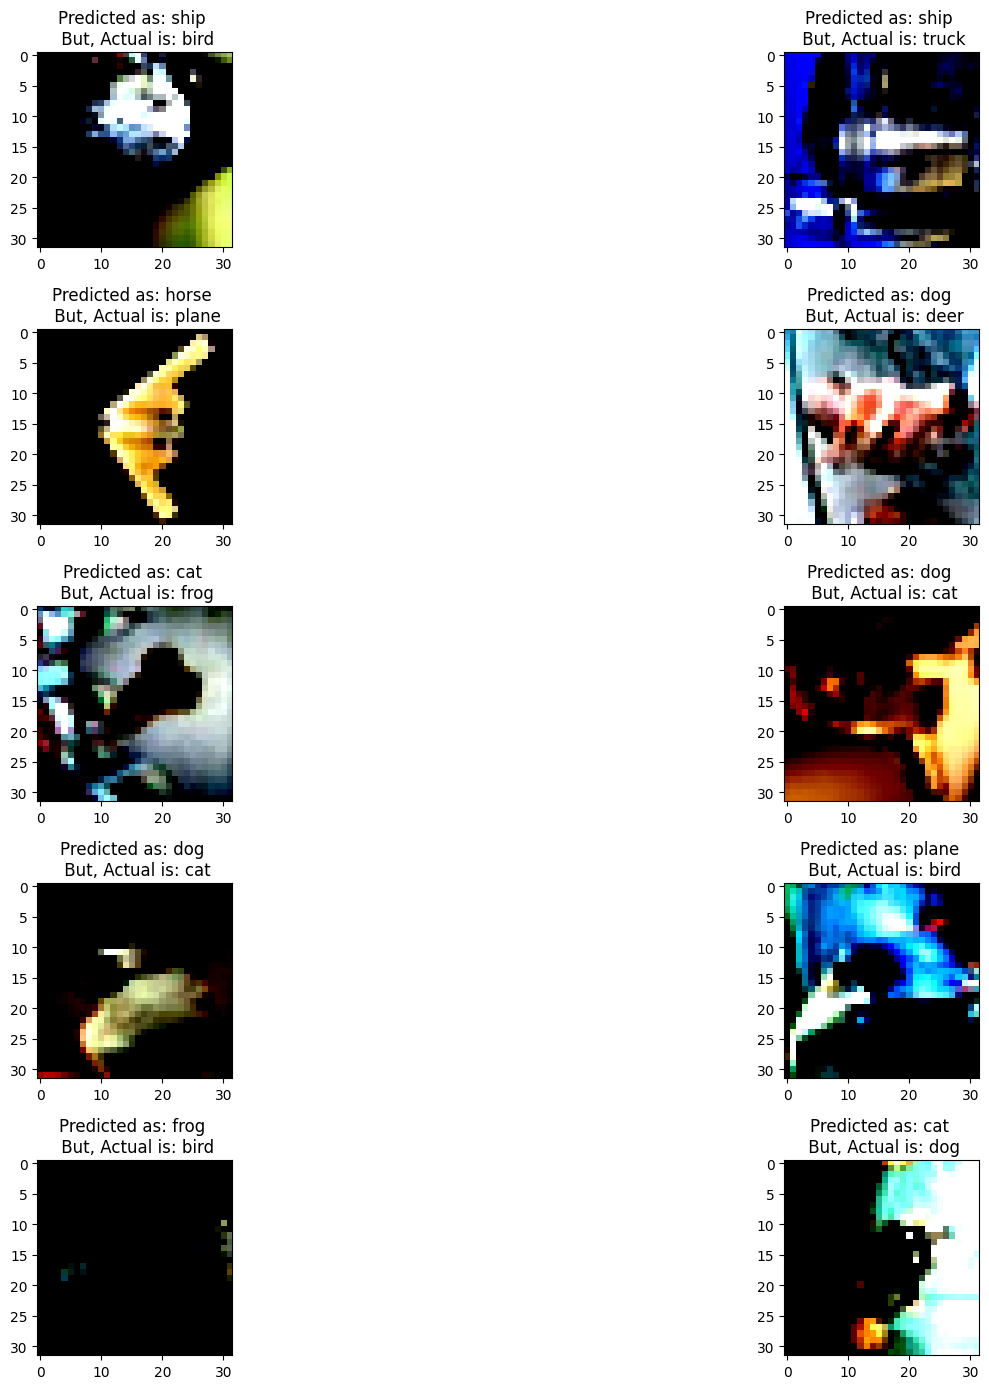

In [22]:
Plots((model,test_loader,device,10)).mis_classified()